# ENM_3440_HW1

The following methodology was developed by ChatGPT 3.5:

**Step 1: Define the Problem and Objectives**

The project at hand seeks to understand if statistics not directly related to the plot of the movie can be used to predict its audience perception rating. The question being asked is, “What factors can be used to predict how well a movie is perceived by an audience?”. In this project, statistics involving runtime and year of release will be compared to movies’ audience ratings to see if there is a correlation between either of the two categories and rating. Through this analysis, this project hopes to start discovering trends that allow a movie’s audience rating to be predicted. 

**Step 2: Data Collection**

The dataset used for this project can be found here: https://www.kaggle.com/datasets/padhmam/amazon-prime-movies. 

This data includes 7,261 movies available on Amazon Prime. Each movie also contains metadata about it—including its runtime, year of release, language, and IMDb rating. The IMDb rating is the audience perception rating that will be used. IMDb allows its website users to rate a movie in its database between 1 and 10, and the average of these ratings is a movie’s overall IMDb rating. IMDb allows users to make an account and rate movies for free, and all of its users are everyday movie watchers, not film critics.

A challenge I came across in this project was finding large, publicly available datasets. I had many questions, but most of those questions required data that was not publicly published or were behind a paywall. This led me to my dataset on Kaggle, a website that provides large, well-maintained datasets for free. Amazon Prime Video is actually directly linked to IMDb, which is why the only dataset of movies with comprehensvie audience ratings I was able to find publicly were on Amazon Prime Video. 

**Step 3: Data Cleaning and Preprocessing**

Because I am using a preprocessed dataset from Kaggle, I did not need to do that much cleaning. However, I did need to clean the data to remove any movies with missing values for any of the categories I would be doing analysis on later. This step lowered the dataset to 5,838 samples.

In [9]:
import pandas as pd

# Load your CSV data into a Pandas DataFrame
data = pd.read_csv('amazon_prime_movies.csv')

# List of columns with missing values to check
columns_to_check = ['IMDb Rating', 'Running Time', 'Movie Name', 'Year of Release']

# Remove rows with missing values in the specified columns
data_cleaned = data.dropna(subset=columns_to_check)

# Print the shape of the cleaned dataset to check how many rows were removed
print("Original Dataset Shape:", data.shape)
print("Cleaned Dataset Shape:", data_cleaned.shape)

# Optionally, you can save the cleaned dataset to a new CSV file
data_cleaned.to_csv('cleaned_dataset.csv', index=False)


Original Dataset Shape: (8127, 7)
Cleaned Dataset Shape: (5838, 7)


**Step 4: Exploratory Data Analysis (EDA)**
First, I plot the runtime of each movie vs their IMDb ratings.

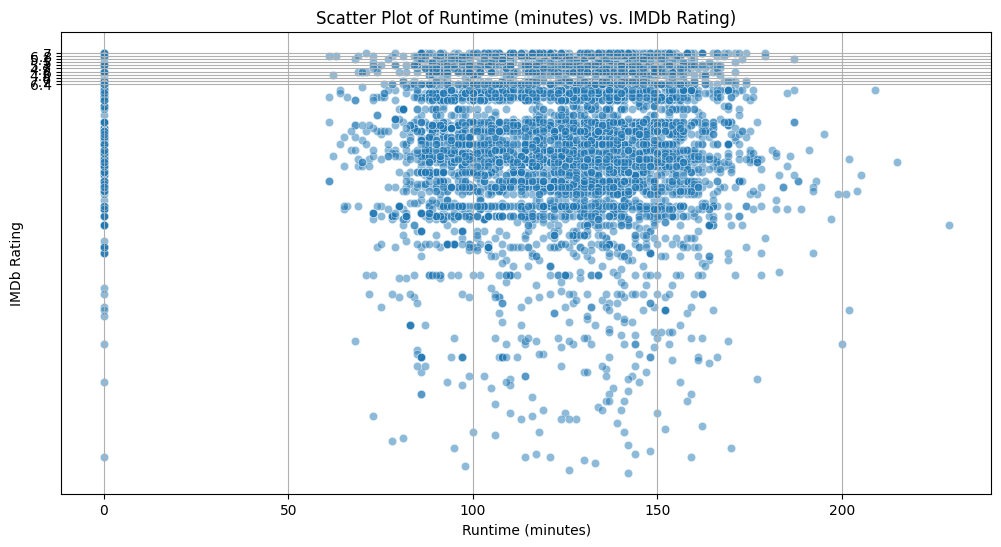

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your movie CSV data into a Pandas DataFrame
data = pd.read_csv('cleaned_dataset.csv')

# Extract the 'Running Time' and 'IMDb Rating' columns
runtime_str = data['Running Time']
imdb_rating = data['IMDb Rating']

# Function to convert runtime strings to minutes
def convert_runtime_to_minutes(runtime_str):
    parts = runtime_str.split()
    total_minutes = 0

    for i in range(len(parts)):
        if parts[i] == 'h':
            total_minutes += int(parts[i - 1]) * 60
        elif parts[i] == 'min' or parts[i] == 'mins':
            total_minutes += int(parts[i - 1])

    return total_minutes

# Apply the conversion function to the 'Running Time' column
runtime_minutes = runtime_str.apply(convert_runtime_to_minutes)

# Create a scatterplot using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(x=runtime_minutes, y=imdb_rating, alpha=0.5)
plt.title('Scatter Plot of Runtime (minutes) vs. IMDb Rating)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.yticks(range(11))  # Set y-axis ticks to integers from 0 through 10
plt.grid(True)

# Show the plot
plt.show()

A challenge I faced here is that I could not get the y-axis to cooperate. I played around with it, and the solutions provided by Chat_GPT seemed to make the y-axis worse. Additionally, there seem to be a decent number of movies plotted at a runtime of 0 minutes. After checking the data manually, I was unable to find movies with a runtime of 0 minutes. I attempted to try several different algorithms for converting the runtime to minutes, but I was unable to discover which movies were causing this problem. This coupled with the lack of readable y-axis labels make the graph hard to interperate, but it does appear that there is no strong correlation between runtime and audience rating. Next, I plot IMDb ratings versus year of release.

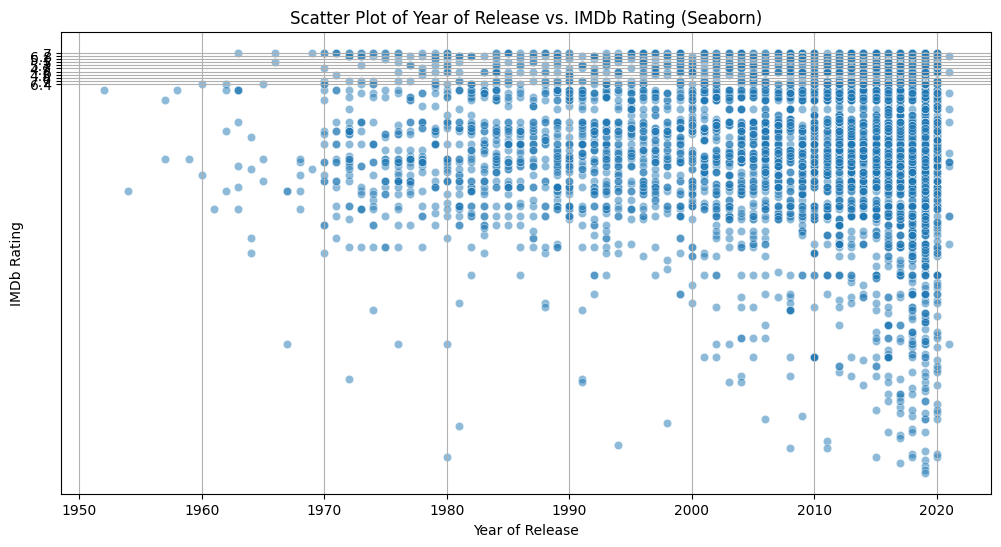

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your movie CSV data into a Pandas DataFrame
data = pd.read_csv('cleaned_dataset.csv')

# Extract the 'Year of Release' and 'IMDb Rating' columns
year_of_release = data['Year of Release']
imdb_rating = data['IMDb Rating']

# Create a scatterplot using Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(x=year_of_release, y=imdb_rating, alpha=0.5)
plt.title('Scatter Plot of Year of Release vs. IMDb Rating')
plt.xlabel('Year of Release')

plt.ylabel('IMDb Rating')
plt.grid(True)
plt.yticks(range(11))  # Set y-axis ticks to integers from 0 through 10
# Show the plot
plt.show()


I faced similar challenges as my previoius plot with my y-axis. In this plot there is a much clearer conlcusion that can be made. Older movies have on average much higher IMDb ratings. The more recent the year, the more the movie ratings are evenly distributed between 1 and 10. However, movies before 2000 are more consistently higher rated.

**Step 5: Conclusions, Challenges, and Future Directions**

Between these two factors, year of release is a more accurate way to predict a movie's audience rating than its runtime. 

I faced a lot of challeneges doing this project. I had many more questions I wanted to investigate (How does how does a movie's language related to the IMDb ratings? Are there keywords in the plot description that can be used to predict a movie's rating?) but couldn't successfully find answers for. In fact, one of my biggest issues was with the code ChatGPT 3.5 produced. Often times, it produced errors I got stuck on for long periods of time troubleshooting, but was unable to solve. For example, when I asked ChatGPT to seperate the movies by language and find the average IMDb rating for each language group, ChatGPT kept producing code that was conceptually wrong and threw error telling me I had reached my laptop's computing limit even when I tried to correct the code manually. I've definitely learned to be a lot more skeptical of ChatGPT's coding abilities. Another challenge I faced was understanding learning to use Jupyter notebook. I was out for the class where we learned Jupyter Notebook, so I asked ChatGPT to teach me how to use it instead. ChatGPT led me in a direction that made using Jupyter notebook a lot harder (telling me to use it from the command line). Instead, I ended up ignoring ChatGPT and watching a YouTube tutorial on how to use Jupyter notebook on an IDE, which was a lot easier. 

In the future, I'd like to continue investigating this question with more data than Kaggle was able to provide. I think with more metadata categories for each movie, other trends could be found to prodict IMDb ratings. Additionally, I'd like to continue working through the challenges I faced throughout this project, such as fixing the y-axis on my plots and plotting the other data without throwing errors, in order to better analyze the data I already have. 
